In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib_venn import venn3
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importing DEGs discovered by [Lin et al 2018, Neuron](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6023751/)

In [2]:
def read_DEip(celltype='Neuron', dirpath='../../results/2021-12-08-apoe-de-genes-tunahan/'):
    fpath = dirpath + celltype + '-apoe-de'
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEip = {'Lin 2018 ' + celltype: read_DEip(celltype) for celltype in ['Neuron', 'Astrocyte', 'Microglia-like']}

Importing DEGs discovered by [Mathys et al 2019, Nature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6865822/)

In [3]:
def read_DEsc(celltype='Ex', dirpath='../../results/2022-01-31-single-cell-de-genes/'):
    fpath = dirpath + 'single-cell-' + celltype + '-de'
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEsc = {'Mathys 2019 ' + celltype: read_DEsc(celltype) for celltype in ['Ex', 'In', 'Ast', 'Oli', 'Opc', 'Mic']}

In [4]:
def read_DEap(genotype='apoe3-apoe3', dirpath='../../results/2021-11-28-ad-de-genes-apoe/'):
    fpath = dirpath + 'ad-de-genes-' + genotype
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEap = {'Taubes 2021 ' + celltype: read_DEap(celltype) for celltype in ['apoe3-apoe3', 'apoe4-apoe4']}

In [5]:
DE = dict()
DE.update(DEip)
DE.update(DEsc)
DE.update(DEap)
DE.keys()

dict_keys(['Lin 2018 Neuron', 'Lin 2018 Astrocyte', 'Lin 2018 Microglia-like', 'Mathys 2019 Ex', 'Mathys 2019 In', 'Mathys 2019 Ast', 'Mathys 2019 Oli', 'Mathys 2019 Opc', 'Mathys 2019 Mic', 'Taubes 2021 apoe3-apoe3', 'Taubes 2021 apoe4-apoe4'])

['named-figure/de-gene-counts.png', 'named-figure/de-gene-counts.pdf']

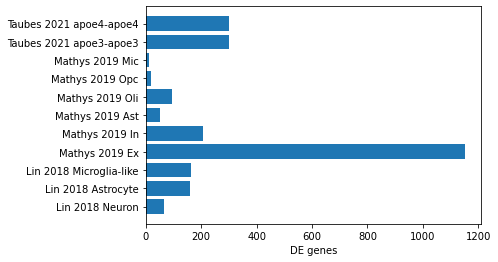

In [6]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(DE)), [len(v) for v in DE.values()])
ax.set_yticks(np.arange(len(DE)))
ax.set_yticklabels(DE.keys())
ax.set_xlabel('DE genes')
attila_utils.savefig(fig, 'de-gene-counts')

In [7]:
def count_intersection(A='Mathys 2019 Ex', B='Lin 2018 Astrocyte', jaccard=False, DE=DE):
    isect = set(DE[A]).intersection(set(DE[B]))
    count = len(isect)
    if not jaccard:
        return(count)
    jaccard = count / (len(set(DE[A])) + len(set(DE[B])))
    return(jaccard)

count_intersection()

2

In [8]:
isec = np.array([[count_intersection(A, B, jaccard=False) for A in DE.keys()] for B in DE.keys()])
isec_df = pd.DataFrame(isec, index=DE.keys(), columns=DE.keys())
isec_df

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4
Lin 2018 Neuron,64,6,6,5,1,0,0,0,0,1,0
Lin 2018 Astrocyte,6,159,8,2,2,0,1,0,0,0,2
Lin 2018 Microglia-like,6,8,162,10,1,0,2,0,0,1,3
Mathys 2019 Ex,5,2,10,1151,173,19,23,4,0,48,49
Mathys 2019 In,1,2,1,173,207,6,16,2,0,22,19
Mathys 2019 Ast,0,0,0,19,6,51,4,2,2,5,2
Mathys 2019 Oli,0,1,2,23,16,4,96,3,0,13,4
Mathys 2019 Opc,0,0,0,4,2,2,3,18,0,1,1
Mathys 2019 Mic,0,0,0,0,0,2,0,0,10,0,0
Taubes 2021 apoe3-apoe3,1,0,1,48,22,5,13,1,0,300,131


['named-figure/isec-heatmap.png', 'named-figure/isec-heatmap.pdf']

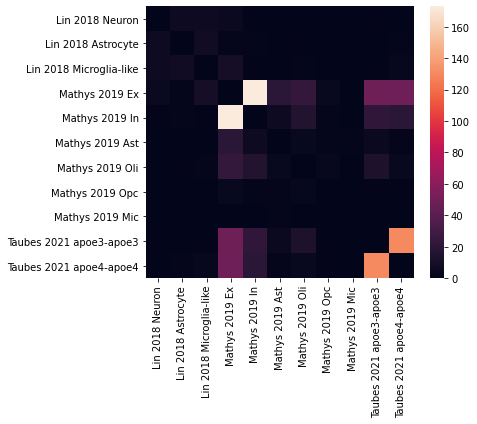

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
np.fill_diagonal(isec, 0)
sns.heatmap(isec, ax=ax, vmin=0, vmax=isec.max(), xticklabels=DE.keys(), yticklabels=DE.keys())
attila_utils.savefig(fig, 'isec-heatmap')

In [10]:
jaccard = np.array([[count_intersection(A, B, jaccard=True) for A in DE.keys()] for B in DE.keys()])
jaccard_df = pd.DataFrame(jaccard, index=DE.keys(), columns=DE.keys())
jaccard_df

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4
Lin 2018 Neuron,0.500000,0.026906,0.026549,0.004115,0.003690,0.000000,0.000000,0.000000,0.000000,0.002747,0.000000
Lin 2018 Astrocyte,0.026906,0.500000,0.024922,0.001527,0.005464,0.000000,0.003922,0.000000,0.000000,0.000000,0.004357
Lin 2018 Microglia-like,0.026549,0.024922,0.500000,0.007616,0.002710,0.000000,0.007752,0.000000,0.000000,0.002165,0.006494
Mathys 2019 Ex,0.004115,0.001527,0.007616,0.500000,0.127393,0.015807,0.018444,0.003422,0.000000,0.033081,0.033770
Mathys 2019 In,0.003690,0.005464,0.002710,0.127393,0.500000,0.023256,0.052805,0.008889,0.000000,0.043393,0.037475
Mathys 2019 Ast,0.000000,0.000000,0.000000,0.015807,0.023256,0.500000,0.027211,0.028986,0.032787,0.014245,0.005698
Mathys 2019 Oli,0.000000,0.003922,0.007752,0.018444,0.052805,0.027211,0.500000,0.026316,0.000000,0.032828,0.010101
Mathys 2019 Opc,0.000000,0.000000,0.000000,0.003422,0.008889,0.028986,0.026316,0.500000,0.000000,0.003145,0.003145
Mathys 2019 Mic,0.000000,0.000000,0.000000,0.000000,0.000000,0.032787,0.000000,0.000000,0.500000,0.000000,0.000000
Taubes 2021 apoe3-apoe3,0.002747,0.000000,0.002165,0.033081,0.043393,0.014245,0.032828,0.003145,0.000000,0.500000,0.218333


['named-figure/jaccard-heatmap.png', 'named-figure/jaccard-heatmap.pdf']

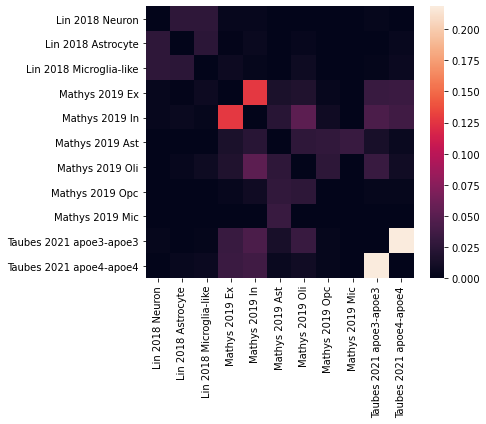

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
np.fill_diagonal(jaccard, 0)
sns.heatmap(jaccard, ax=ax, vmin=0, vmax=jaccard.max(), xticklabels=DE.keys(), yticklabels=DE.keys())
attila_utils.savefig(fig, 'jaccard-heatmap')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


['named-figure/jaccard-clustermap.png', 'named-figure/jaccard-clustermap.pdf']

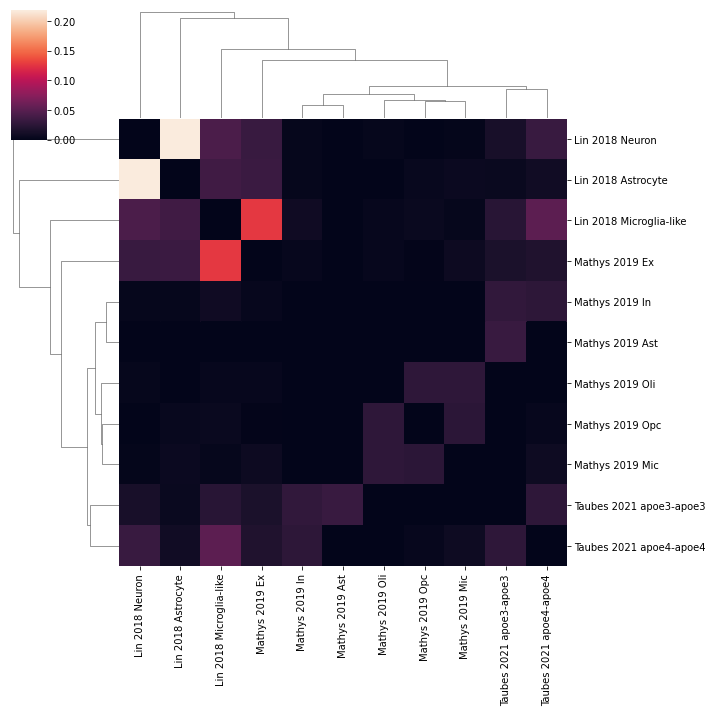

In [12]:
g = sns.clustermap(jaccard, vmin=0, vmax=jaccard.max(), xticklabels=DE.keys(), yticklabels=DE.keys())
attila_utils.savefig(g, 'jaccard-clustermap')

## Genes supported by $k$ studies

In [13]:
l = list(set(itertools.chain(*[v for v in DE.values()])))
l.sort()
membership = pd.concat([pd.DataFrame(1, index=v, columns=[k]).reindex(l).fillna(0).astype(bool) for k, v in DE.items()], axis=1)
membership['frequency'] = membership.apply(sum, axis=1)
membership = membership.sort_values('frequency', ascending=False)
frequency = membership.value_counts()

In [14]:
#membership.iloc[:13]
def style_False(v, props=''):
    return props if not v else None

membership.iloc[:13].style.applymap(style_False, props='color:lightgray;')

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4,frequency
TAGLN3,False,False,False,True,True,False,True,False,False,True,False,4
YWHAG,False,False,False,True,True,False,False,False,False,True,True,4
SPARCL1,False,False,False,True,True,False,True,False,False,False,True,4
CKB,False,False,False,True,True,False,True,True,False,False,False,4
RAB3A,False,False,False,True,True,False,True,False,False,True,False,4
CCK,False,False,False,True,False,True,True,False,False,True,False,4
SCG5,False,False,False,True,True,False,False,False,False,True,True,4
MRPL57,False,False,False,True,True,False,False,False,False,True,True,4
BEX5,False,False,False,True,True,False,False,False,False,True,True,4
YWHAH,False,False,False,True,True,False,True,False,False,True,False,4


In [15]:
#membership.iloc[13:71]
membership.iloc[13:71].style.applymap(style_False, props='color:lightgray;')

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4,frequency
PCMT1,False,False,False,True,False,False,False,False,False,True,True,3
RAPH1,False,False,False,True,False,True,False,True,False,False,False,3
SUB1,False,False,False,True,True,False,False,False,False,True,False,3
CRYM,False,False,False,True,False,False,False,False,False,True,True,3
RASGEF1B,False,False,False,True,True,False,True,False,False,False,False,3
TUBA1B,False,False,False,False,False,True,True,True,False,False,False,3
SST,False,False,False,True,False,False,False,False,False,True,True,3
SRP14,False,False,False,True,True,True,False,False,False,False,False,3
MDH1,False,False,False,True,True,False,False,False,False,True,False,3
UQCR10,False,False,False,True,True,True,False,False,False,False,False,3


In [16]:
%connect_info

{
  "shell_port": 55106,
  "iopub_port": 55107,
  "stdin_port": 55108,
  "control_port": 55110,
  "hb_port": 55109,
  "ip": "127.0.0.1",
  "key": "9099dd1f-44fd73fdd3f42b42b734624c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-7881f80e-ee34-49c2-8c24-d74718a7aa11.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
